# NBA Notebooks - Jacob Mitchell
## Shot Chart For Player
Step by Step completion of the following cells can be used to create shot charts for a player by season. <br>
The following code to create this is a derivative of the code provided [here](https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d).

In [36]:
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playbyplayv2
from nba_api.stats.endpoints import shotchartdetail
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

## Getting Shot Data By TeamID and PlayerID
Team ID and PlayerID can be retrieved through [playerTeamIDRetriever](http://localhost:8888/notebooks/playerTeamIDRetriever.ipynb) page. Paste into team_id and player_id statements <br>
In order to change the season, season_nullable can be changed to the desired season

In [134]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = 1610612755, #TeamID retrieved from above link
            player_id = 203954, #PlayerID retrieved from above link
            context_measure_simple = 'FGA', #FGA includes not made shots whereas PTS is all made shots
            season_nullable = '2020-21', #Season Format is 'YYYY-YY(+1)'
            season_type_all_star = 'Regular Season')

In [135]:
shot_data = json.loads(shot_json.get_json())

In [136]:
#shot_data

In [137]:
relevant_data = shot_data['resultSets'][0]
relevant_data

{'name': 'Shot_Chart_Detail',
 'headers': ['GRID_TYPE',
  'GAME_ID',
  'GAME_EVENT_ID',
  'PLAYER_ID',
  'PLAYER_NAME',
  'TEAM_ID',
  'TEAM_NAME',
  'PERIOD',
  'MINUTES_REMAINING',
  'SECONDS_REMAINING',
  'EVENT_TYPE',
  'ACTION_TYPE',
  'SHOT_TYPE',
  'SHOT_ZONE_BASIC',
  'SHOT_ZONE_AREA',
  'SHOT_ZONE_RANGE',
  'SHOT_DISTANCE',
  'LOC_X',
  'LOC_Y',
  'SHOT_ATTEMPTED_FLAG',
  'SHOT_MADE_FLAG',
  'GAME_DATE',
  'HTM',
  'VTM'],
 'rowSet': [['Shot Chart Detail',
   '0022000013',
   7,
   203954,
   'Joel Embiid',
   1610612755,
   'Philadelphia 76ers',
   1,
   11,
   43,
   'Missed Shot',
   'Fadeaway Jump Shot',
   '2PT Field Goal',
   'Mid-Range',
   'Center(C)',
   '8-16 ft.',
   14,
   -4,
   147,
   1,
   0,
   '20201223',
   'PHI',
   'WAS'],
  ['Shot Chart Detail',
   '0022000013',
   48,
   203954,
   'Joel Embiid',
   1610612755,
   'Philadelphia 76ers',
   1,
   8,
   1,
   'Made Shot',
   'Alley Oop Dunk Shot',
   '2PT Field Goal',
   'Restricted Area',
   'Center(C)',
 

In [25]:
relevant_data

{'name': 'Shot_Chart_Detail',
 'headers': ['GRID_TYPE',
  'GAME_ID',
  'GAME_EVENT_ID',
  'PLAYER_ID',
  'PLAYER_NAME',
  'TEAM_ID',
  'TEAM_NAME',
  'PERIOD',
  'MINUTES_REMAINING',
  'SECONDS_REMAINING',
  'EVENT_TYPE',
  'ACTION_TYPE',
  'SHOT_TYPE',
  'SHOT_ZONE_BASIC',
  'SHOT_ZONE_AREA',
  'SHOT_ZONE_RANGE',
  'SHOT_DISTANCE',
  'LOC_X',
  'LOC_Y',
  'SHOT_ATTEMPTED_FLAG',
  'SHOT_MADE_FLAG',
  'GAME_DATE',
  'HTM',
  'VTM'],
 'rowSet': [['Shot Chart Detail',
   '0021500003',
   6,
   201939,
   'Stephen Curry',
   1610612744,
   'Golden State Warriors',
   1,
   10,
   56,
   'Made Shot',
   'Cutting Finger Roll Layup Shot',
   '2PT Field Goal',
   'Restricted Area',
   'Center(C)',
   'Less Than 8 ft.',
   3,
   12,
   31,
   1,
   1,
   '20151027',
   'GSW',
   'NOP'],
  ['Shot Chart Detail',
   '0021500003',
   19,
   201939,
   'Stephen Curry',
   1610612744,
   'Golden State Warriors',
   1,
   9,
   13,
   'Made Shot',
   'Jump Shot',
   '3PT Field Goal',
   'Above the Bre

In [138]:
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [139]:
player_data = pd.DataFrame(rows)
player_data.columns = headers

In [141]:
print(player_data)

             GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  PLAYER_NAME  \
0    Shot Chart Detail  0022000013              7     203954  Joel Embiid   
1    Shot Chart Detail  0022000013             48     203954  Joel Embiid   
2    Shot Chart Detail  0022000013             58     203954  Joel Embiid   
3    Shot Chart Detail  0022000013             83     203954  Joel Embiid   
4    Shot Chart Detail  0022000013             95     203954  Joel Embiid   
..                 ...         ...            ...        ...          ...   
894  Shot Chart Detail  0022001055            258     203954  Joel Embiid   
895  Shot Chart Detail  0022001055            282     203954  Joel Embiid   
896  Shot Chart Detail  0022001055            354     203954  Joel Embiid   
897  Shot Chart Detail  0022001055            379     203954  Joel Embiid   
898  Shot Chart Detail  0022001055            392     203954  Joel Embiid   

        TEAM_ID           TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0    1610

## Making an NBA Court 

In [218]:
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=3, color=color)
    ax.plot([220, 220], [0, 140], linewidth=3, color=color)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=3))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=3, color=color)
    ax.plot([80, 80], [0, 190], linewidth=3, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=3, color=color)
    ax.plot([60, 60], [0, 190], linewidth=3, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=3, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=3))
    ax.patch.set_edgecolor('cyan')  
    ax.patch.set_linewidth('3') 
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=3))   
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=3, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = 18
    mpl.rcParams['axes.linewidth'] = 5

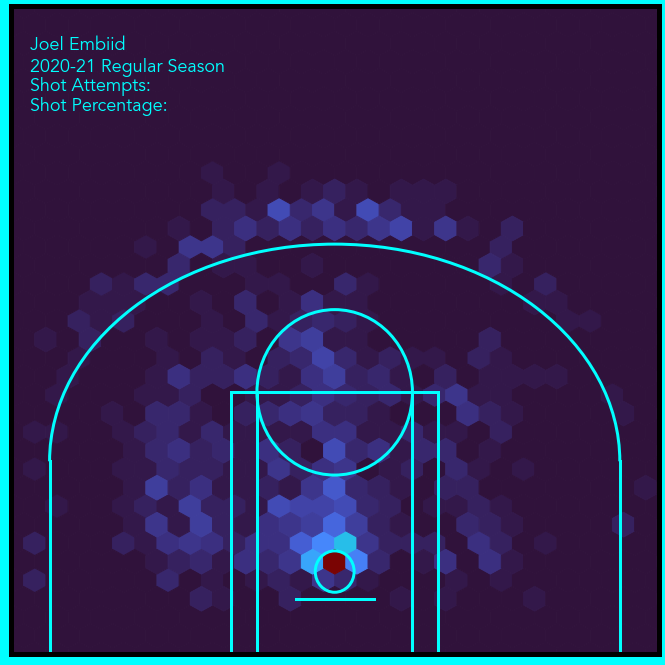

In [220]:
fig = plt.figure(figsize=(9, 9))#, facecolor='cyan') This adds that cyan border to the outside. I want to make a larger chart such as a visual would have but I might need to do photoshop for that
ax = fig.add_axes([0, 0, 1, 1])
ax.hexbin(player_data['LOC_X'], player_data['LOC_Y'] + 60, gridsize=(35, 35), extent=(-300, 300, 0, 940), cmap='turbo')
ax.text(0.03, 0.90, 'Joel Embiid\n2020-21 Regular Season', transform=ax.transAxes, ha='left', va='baseline', color='cyan')
ax.text(0.03, 0.87, 'Shot Attempts: ', transform=ax.transAxes, ha='left', color='cyan')
ax.text(0.03, 0.84, 'Shot Percentage: ', transform=ax.transAxes, ha='left', color='cyan')
ax = create_court(ax, 'cyan')
plt.show()
fig.savefig('joelEmbiid_2020_21ShotChart.png')


In [145]:
shots_made = sum(player_data['SHOT_MADE_FLAG'])
shots_made

461

In [147]:
shots_attempted = len(player_data['SHOT_MADE_FLAG'])
shots_attempted

899

In [148]:
shot_percentage=shots_made/shots_attempted
shot_percentage

0.5127919911012235

In [150]:
player_data['SHOT_ZONE_AREA'].unique()

array(['Center(C)', 'Right Side(R)', 'Left Side(L)',
       'Left Side Center(LC)', 'Right Side Center(RC)', 'Back Court(BC)'],
      dtype=object)

In [222]:
#Come back and calculate other percentages. Can I color coat those?